  0%|          | 0/45 [00:00<?, ?it/s]

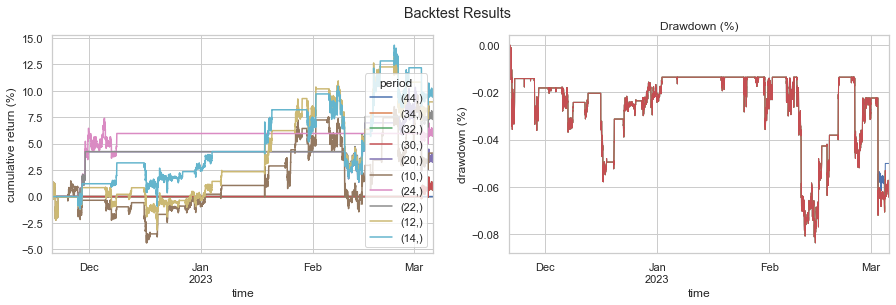

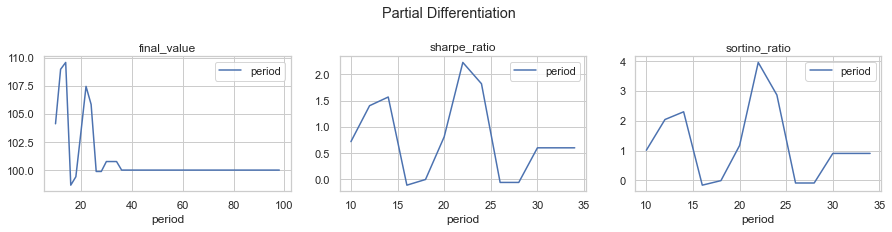

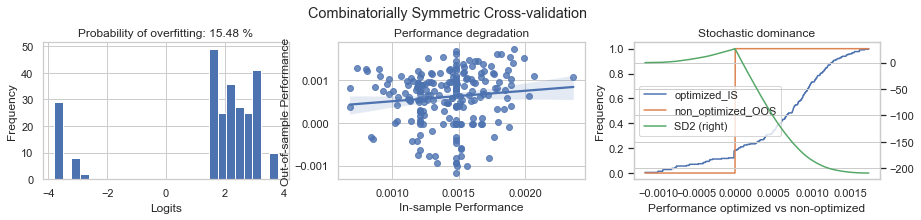

Output()

best period: 14


,rsi,buy,sell
timestamp,,,
2022-11-21 00:00:00+00:00,NaN,False,False
2022-11-21 00:15:00+00:00,100.000000,False,True
2022-11-21 00:30:00+00:00,70.209890,False,False
2022-11-21 00:45:00+00:00,89.219476,False,True
2022-11-21 01:00:00+00:00,89.417581,False,True
...,...,...,...
2023-03-06 04:45:00+00:00,41.205738,False,False
2023-03-06 05:00:00+00:00,43.442978,False,False
2023-03-06 05:15:00+00:00,41.093683,False,False


In [6]:
from binance.client import Client
import numpy as np
from binance.enums import *
import finlab_crypto
from finlab_crypto import Strategy
import pandas as pd
from binance import Client
import requests
from finta import TA

# 建立客戶端
api_key = 'q83082FKrJBQmMxUrpVrEcaPhummrxW7L72rzgEU18uuGCCeDlkjajQ2CMSaob3a'
api_secret = 'XSVPcjjDh5WUZgCx5RZ7DOHWlBp3NxZUnxXmFkZ37hkAnxc5RqR59xzJ0YSXE0Fq'
client = Client(api_key=api_key,api_secret=api_secret)

# 定義漲跌訊號函數
def get_signal(
      pair='BTCUSDT',
      freq='15m',
      n_bar = 10000,
      client = client
      ):
  # get the pair ohlcv data
  ohlcv = finlab_crypto.crawler.get_nbars_binance(pair,freq,n_bar,client)
  
  # def base sma_Strategy
  @Strategy(period=14)
  def rsi_strategy(ohlcv):
    # crete rsi
    rsi = TA.RSI(ohlcv,period=rsi_strategy.period)
    # def entries and exits
    entries = rsi <= 20
    exits = rsi >= 80
    figures = {'rsi':rsi}
    return entries, exits,figures
  
  # search range
  variables = {
      'period': np.arange(10, 100, 2), 
      }
  
  portfolio = rsi_strategy.backtest(ohlcv, variables=variables, freq=freq ,plot=True)
  result = portfolio.total_profit()[portfolio.total_profit()==portfolio.total_profit().max()].to_frame().reset_index()
  best_period = result['period'][0]
  print('best period:',best_period)
  
  # create signal table
  table = pd.DataFrame()
  table['rsi'] = TA.RSI(ohlcv,period=best_period)
  table['buy'] = table['rsi'] <= 20 
  table['sell'] = table['rsi'] >= 80 
  return table
table = get_signal()
table